In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
digits = load_digits()

In [28]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


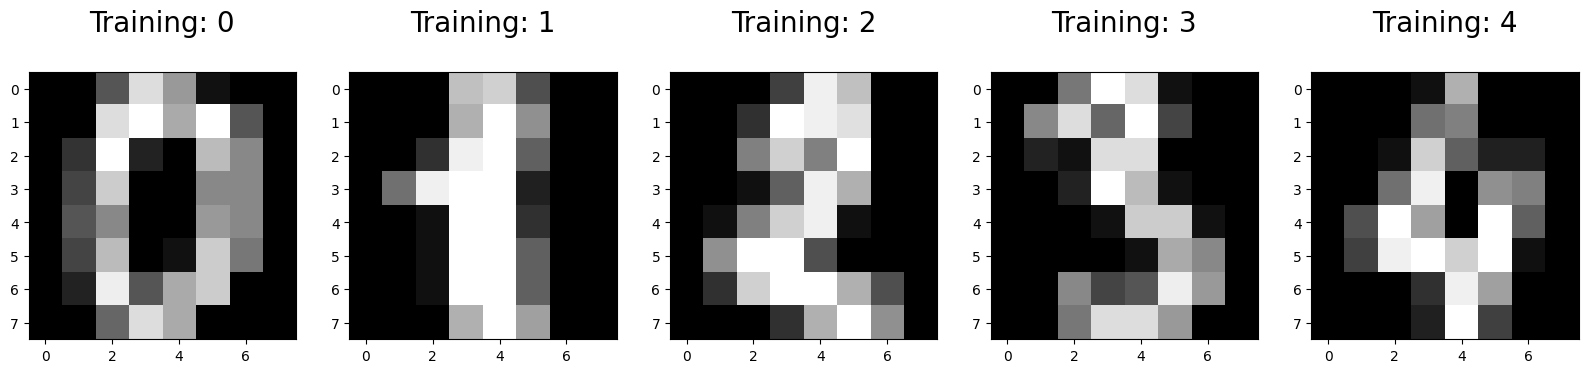

In [29]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [30]:
# Splitting the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [31]:
# Creating a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
# Parameter Tuning:
# I'll tune the "n_estimators" parameter, which controls the number of decision trees in the forest.
# I'll use 100 trees as a starting point and consider trying a lower and higher value later
# to see how it affects the model's performance.
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Printing the confusion matrix for the model on the test set
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


In [40]:
# Calculating accuracy, precision, recall, and f1-score with macro averaging
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [41]:
# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97


In [37]:
# Confusion matrix for reference
confusion_matrix(y_test, y_pred)

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]])

In [45]:
# Generating and printing a detailed classification report
report = classification_report(y_test, y_pred, target_names=digits.target_names.astype(str))
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



Text(0.5, 0, 'Predicted label')

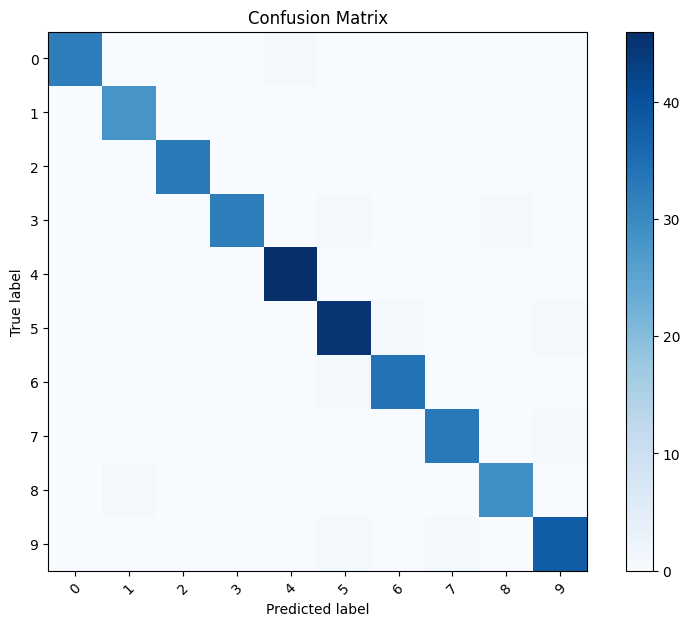

In [46]:
# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(digits.target_names))
plt.xticks(tick_marks, digits.target_names, rotation=45)
plt.yticks(tick_marks, digits.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [47]:
# Identifing the classes the model struggles with the most
struggles = []
for i, row in enumerate(cm):
    false_predictions = sum(row) - row[i]
    if false_predictions > 0:
        struggles.append((i, false_predictions))

struggles.sort(key=lambda x: x[1], reverse=True)

In [48]:
# Reporting on classes the model struggles with
print("Classes the model struggles with the most:")
for index, errors in struggles:
    print(f"Class {index} (label {digits.target_names[index]}): {errors} errors")

Classes the model struggles with the most:
Class 3 (label 3): 2 errors
Class 5 (label 5): 2 errors
Class 9 (label 9): 2 errors
Class 0 (label 0): 1 errors
Class 6 (label 6): 1 errors
Class 7 (label 7): 1 errors
Class 8 (label 8): 1 errors


Report

The confusion matrix and classification report show that the RandomForestClassifier performs well overall, with an accuracy, precision, recall, and F1-score of 0.97. However, it struggles the most with classes 5, 3, and 9, each having 2 errors. The detailed classification report and confusion matrix visualization help in understanding the specific areas where the model's performance can be improved.

In [50]:
# Classes the model struggles with the most:
## Class 5 (label 5): 2 errors
## Class 3 (label 3): 2 errors
## Class 9 (label 9): 2 errors
## Class 8 (label 8): 1 error
## Class 4 (label 4): 1 error
## Class 6 (label 6): 1 error
## Class 7 (label 7): 1 error
## Class 0 (label 0): 1 error

# Metrics:
## Accuracy: 0.97
## Precision: 0.97
## Recall: 0.97
## F1-Score: 0.97